In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/train.csv")

In [4]:
df.columns

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

RhythmScore
count    524164.000000
mean          0.632843
std           0.156899
min           0.076900
25%           0.515850
50%           0.634686
75%           0.739179
max           0.975000
Name: RhythmScore, dtype: float64
AudioLoudness
count    524164.000000
mean         -8.379014
std           4.616221
min         -27.509725
25%         -11.551933
50%          -8.252499
75%          -4.912298
max          -1.357000
Name: AudioLoudness, dtype: float64
VocalContent
count    524164.000000
mean          0.074443
std           0.049939
min           0.023500
25%           0.023500
50%           0.066425
75%           0.107343
max           0.256401
Name: VocalContent, dtype: float64
AcousticQuality
count    524164.000000
mean          0.262913
std           0.223120
min           0.000005
25%           0.069413
50%           0.242502
75%           0.396957
max           0.995000
Name: AcousticQuality, dtype: float64
InstrumentalScore
count    524164.000000
mean          0.117690
st

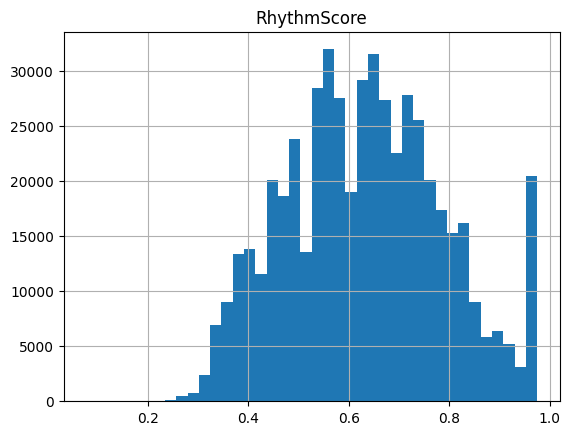

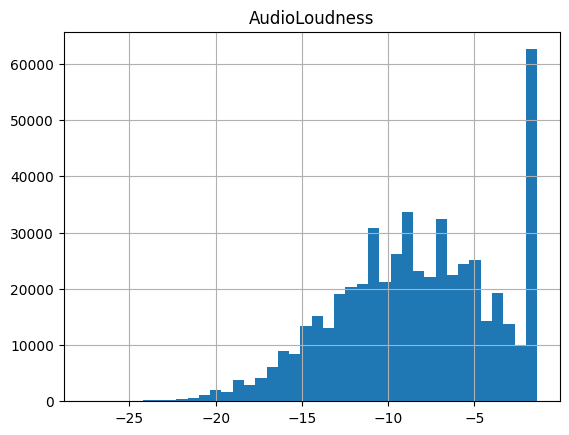

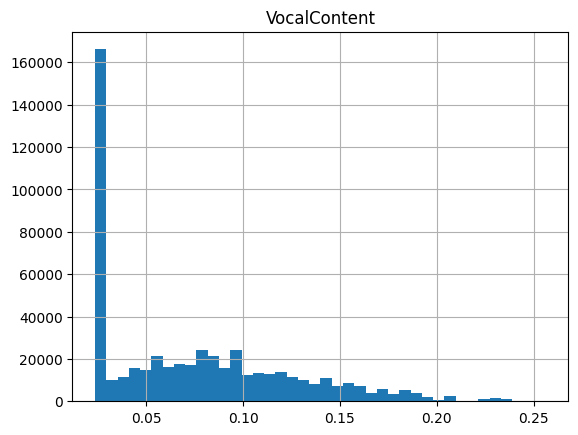

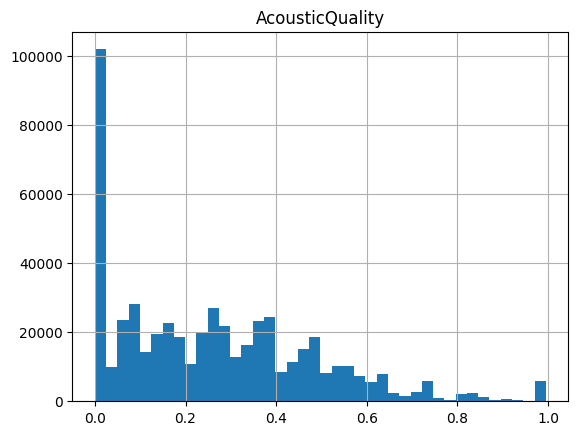

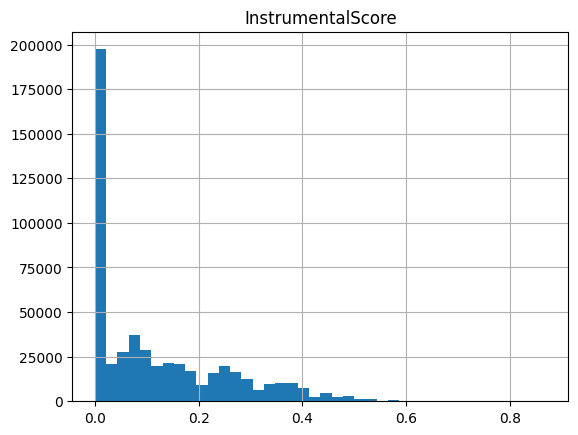

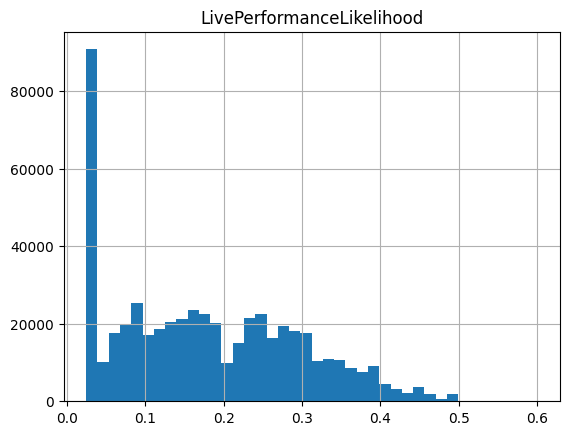

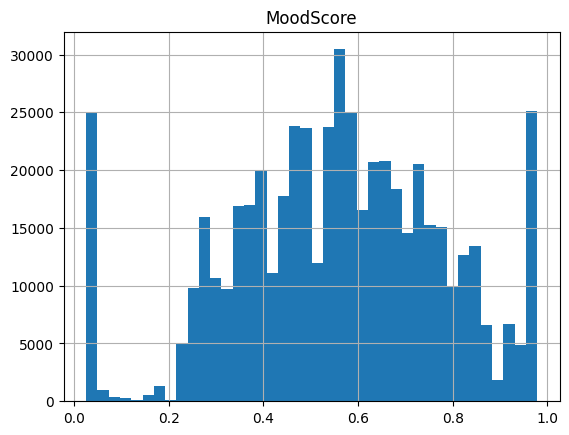

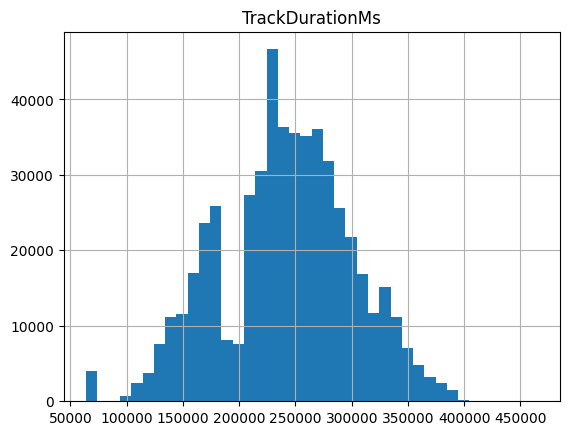

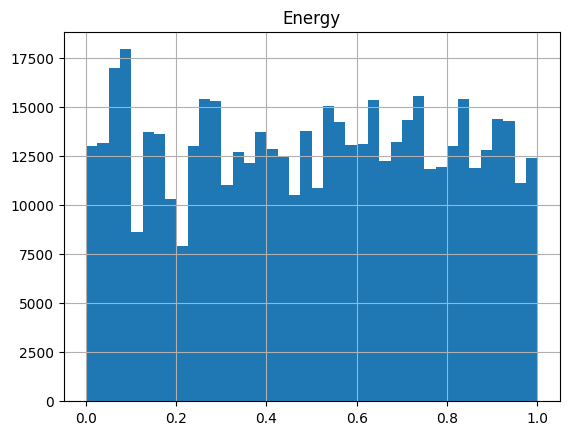

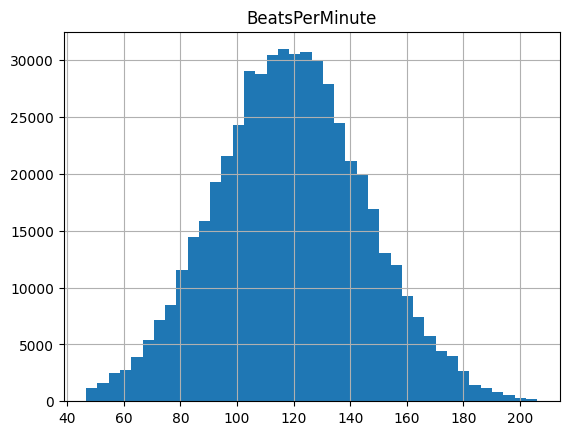

In [5]:
for col in df.columns:
    if col not in ["id"]:
        print(col)
        df.hist(col, bins=40)
        print(df[col].describe())

In [6]:
df.columns

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

In [7]:
for col in df.columns:
    if col != "id":
        print(f"col = {col} has {df[col].isna().sum()} missing values")

col = RhythmScore has 0 missing values
col = AudioLoudness has 0 missing values
col = VocalContent has 0 missing values
col = AcousticQuality has 0 missing values
col = InstrumentalScore has 0 missing values
col = LivePerformanceLikelihood has 0 missing values
col = MoodScore has 0 missing values
col = TrackDurationMs has 0 missing values
col = Energy has 0 missing values
col = BeatsPerMinute has 0 missing values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [9]:
A = df.values

X_train = A[:, 1:-1]
y_train = A[:, -1]

In [10]:
df_test = pd.read_csv("./data/test.csv")
A_test = df_test.values
X_test = A_test[:, 1:]
print(X_train.shape, y_train.shape, X_test.shape)

(524164, 9) (524164,) (174722, 9)


In [11]:
np.savez_compressed("./data/dataset.npz", X_train=X_train, y_train=y_train, X_test=X_test)